In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
data = pd.read_csv('/kaggle/input/amzn-dpz-btc-ntfx-adjusted-may-2013may2019/portfolio_data.csv')

In [5]:
print(data)

           Date         AMZN         DPZ          BTC        NFLX
0      5/1/2013   248.229996   51.190983   106.250000   30.415714
1      5/2/2013   252.550003   51.987320    98.099998   30.641428
2      5/3/2013   258.049988   52.446388   112.900002   30.492857
3      5/6/2013   255.720001   53.205257   109.599998   30.098572
4      5/7/2013   257.730011   54.151505   113.199997   29.464285
...         ...          ...         ...          ...         ...
1515   5/8/2019  1917.770020  283.149994  6171.959961  364.369995
1516   5/9/2019  1899.869995  282.160004  6358.290039  362.750000
1517  5/10/2019  1889.979980  278.369995  7191.359863  361.040009
1518  5/13/2019  1822.680054  273.880005  7980.129883  345.260010
1519  5/14/2019  1840.119995  272.859985  8183.830078  345.609985

[1520 rows x 5 columns]


In [6]:
print(data.isna().sum())

Date    0
AMZN    0
DPZ     0
BTC     0
NFLX    0
dtype: int64


In [7]:
print(data.describe())

              AMZN          DPZ           BTC         NFLX
count  1520.000000  1520.000000   1520.000000  1520.000000
mean    821.541810   146.771695   2421.465669   147.668273
std     518.442653    72.192287   3310.894199   107.641486
min     248.229996    51.190983     69.660004    29.464285
25%     364.360001    84.993593    340.904999    62.851071
50%     686.459992   127.168053    625.304993   104.000000
75%    1121.287536   202.454994   3874.912415   192.207496
max    2039.510010   298.635986  18972.320310   418.970001


In [8]:
print(data.columns)

Index(['Date', 'AMZN', 'DPZ', 'BTC', 'NFLX'], dtype='object')


In [9]:
# Assuming 'data' is your DataFrame with stock price data and 'Date' is the column containing date-time information
data['Date'] = pd.to_datetime(data['Date'])  # Convert 'Date' column to datetime format
data.set_index('Date', inplace=True)  # Set 'Date' column as the index of the DataFrame

# Now 'data' DataFrame has a datetime index


In [10]:
print(data.index)


DatetimeIndex(['2013-05-01', '2013-05-02', '2013-05-03', '2013-05-06',
               '2013-05-07', '2013-05-08', '2013-05-09', '2013-05-10',
               '2013-05-13', '2013-05-14',
               ...
               '2019-05-01', '2019-05-02', '2019-05-03', '2019-05-06',
               '2019-05-07', '2019-05-08', '2019-05-09', '2019-05-10',
               '2019-05-13', '2019-05-14'],
              dtype='datetime64[ns]', name='Date', length=1520, freq=None)


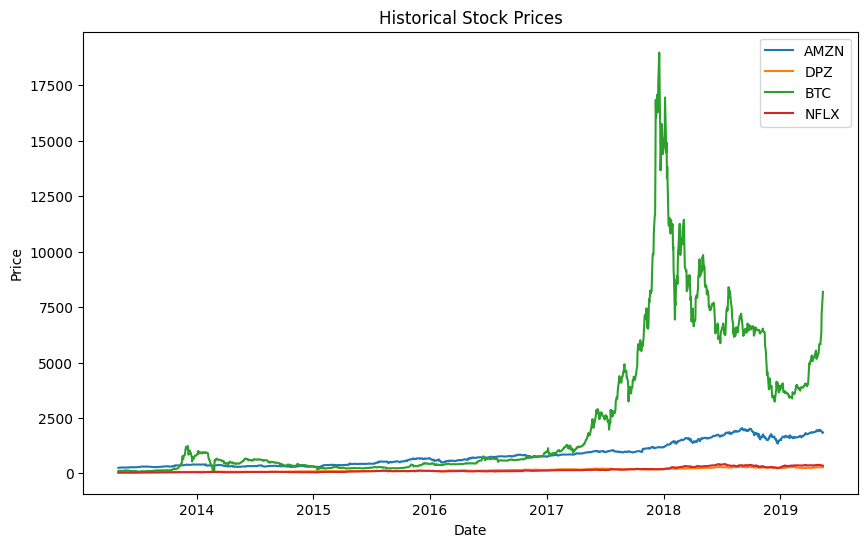

In [11]:
import matplotlib.pyplot as plt
# Assuming 'data' is your DataFrame with a datetime index and columns representing different stocks
# Plotting using Matplotlib
plt.figure(figsize=(10, 6))
for column in data.columns:
    plt.plot(data.index, data[column], label=column)
plt.title('Historical Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

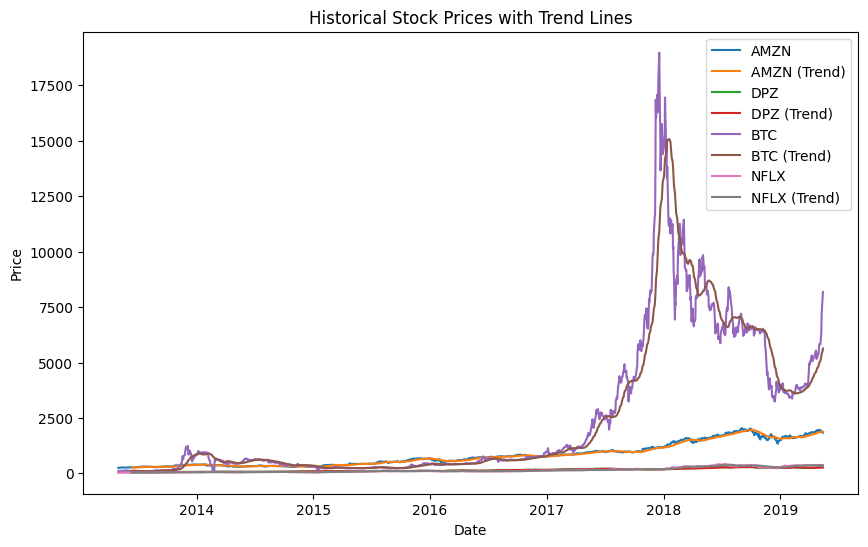

In [12]:
plt.figure(figsize=(10, 6))
for column in data.columns:
    sns.lineplot(data=data[column], label=column)
    sns.lineplot(data=data[column].rolling(window=30).mean(), label=f'{column} (Trend)')
plt.title('Historical Stock Prices with Trend Lines')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

/tmp/ipykernel_33/1355119083.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sns.lineplot(data=data.resample('M').mean())  # Resample data to monthly frequency
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


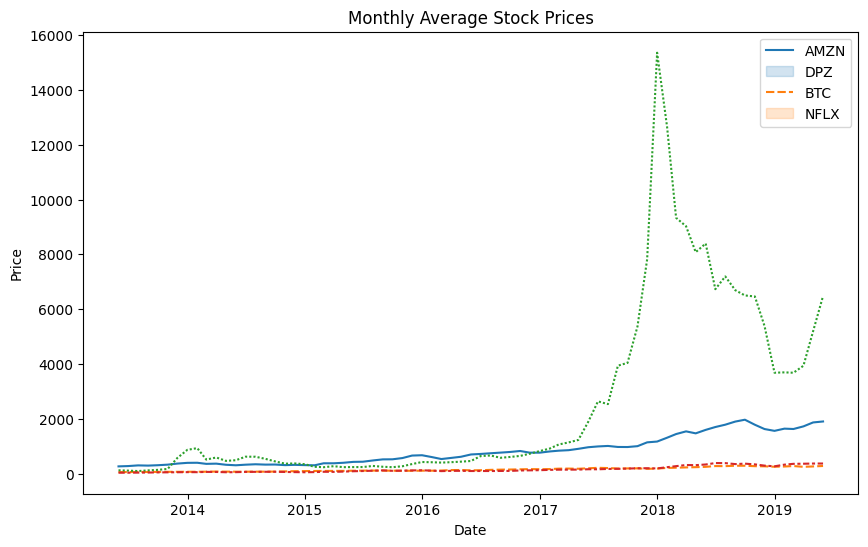

In [13]:
# Plotting at different time frequencies to detect seasonality
plt.figure(figsize=(10, 6))
sns.lineplot(data=data.resample('M').mean())  # Resample data to monthly frequency
plt.title('Monthly Average Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(data.columns)
plt.show()

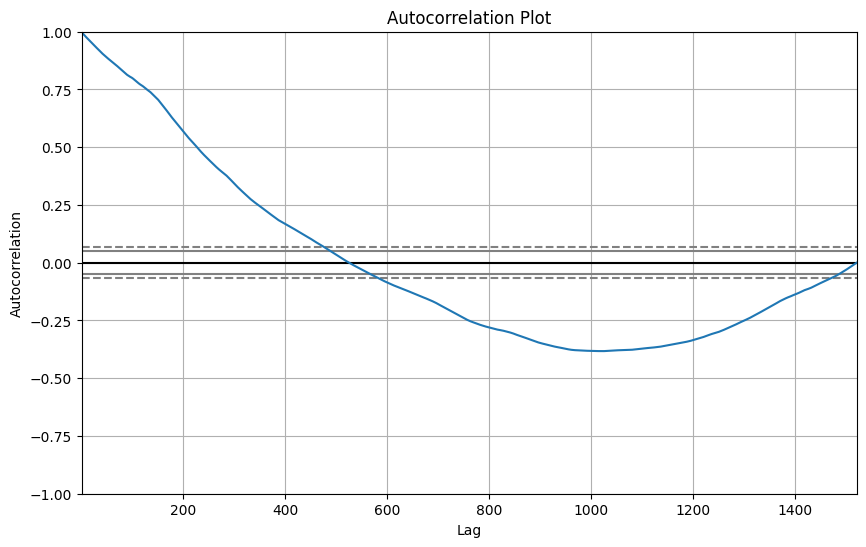

In [14]:
# Autocorrelation plot
plt.figure(figsize=(10, 6))
pd.plotting.autocorrelation_plot(data['AMZN'])
plt.title('Autocorrelation Plot')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()


<Figure size 1000x600 with 0 Axes>

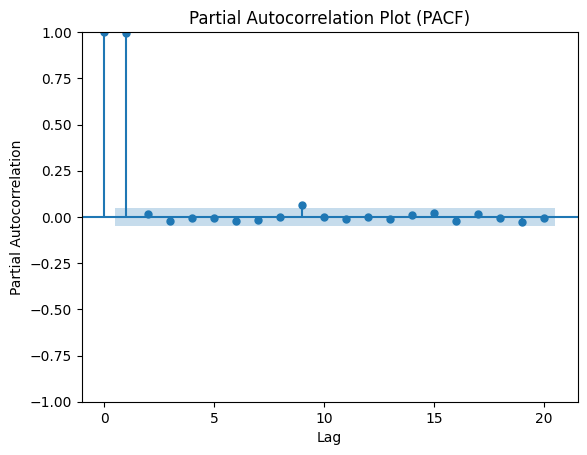

In [15]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(10, 6))
plot_pacf(data['AMZN'], lags=20)  # Adjust the number of lags as needed
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Plot (PACF)')
plt.show()

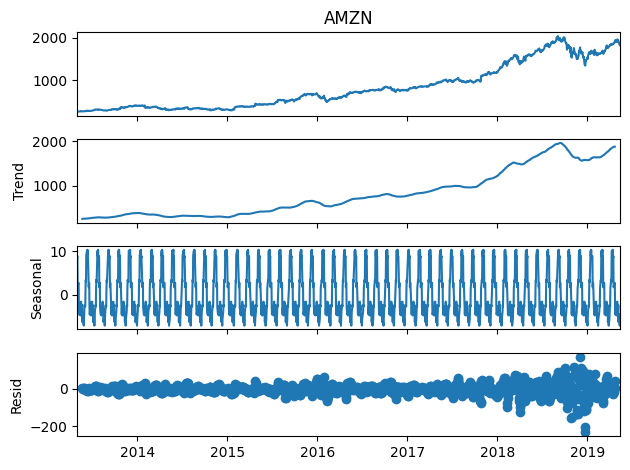

In [16]:
# Seasonal decomposition plot
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data['AMZN'], model='additive', period=30)  # Assuming a seasonal period of 30
decomposition.plot()
plt.show()
